<a href="https://colab.research.google.com/github/BlackBoyZeus/computervision-S-/blob/main/Basic_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

pip install opencv-python


In [1]:
# prompt: a slider using Jupyter widgets

from ipywidgets import interact

def f(x):
    print(x)

interact(f, x=(0, 100, 1))


interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

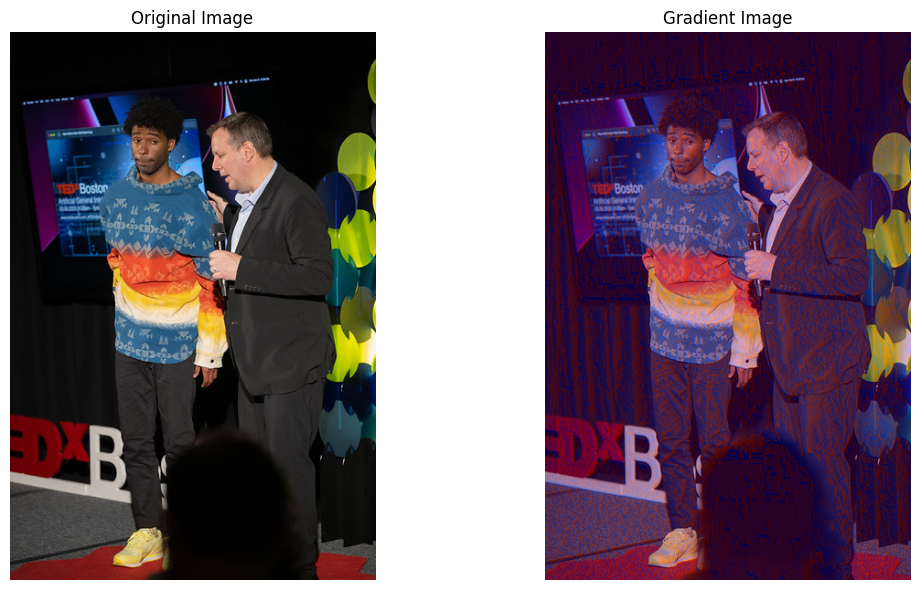

In [33]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Custom image processing function
def createGradientImage(img):
    # Convert the image to grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Define the gradient colors
    start_color = [0, 0, 255]  # Blue
    end_color = [255, 0, 0]    # Red

    # Calculate the gradient direction
    gradient_direction = np.arctan2(cv.Sobel(gray_img, cv.CV_64F, 1, 0), cv.Sobel(gray_img, cv.CV_64F, 0, 1))

    # Normalize the gradient direction to [0, 1] range
    gradient_direction = (gradient_direction - np.min(gradient_direction)) / (np.max(gradient_direction) - np.min(gradient_direction))

    # Generate the gradient image
    gradient_img = np.zeros_like(img, dtype=np.uint8)
    for i in range(3):
        gradient_img[:, :, i] = (1 - gradient_direction) * start_color[i] + gradient_direction * end_color[i]

    # Combine the gradient image and the original image
    processed_img = cv.addWeighted(img, 0.7, gradient_img, 0.3, 0)

    return processed_img

# Load the image from file (replace 'your_image.png' with your image file path)
img = cv.imread('', cv.IMREAD_COLOR)
assert img is not None, "file could not be read, check with os.path.exists()"

# Apply the custom image processing function
processed_img = createGradientImage(img)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(processed_img, cv.COLOR_BGR2RGB))
plt.title('Gradient Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [35]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider

# Custom image processing function
def createGradientImage(img, start_color, end_color):
    # Convert the image to grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Calculate the gradient direction
    gradient_direction = np.arctan2(cv.Sobel(gray_img, cv.CV_64F, 1, 0), cv.Sobel(gray_img, cv.CV_64F, 0, 1))

    # Normalize the gradient direction to [0, 1] range
    gradient_direction = (gradient_direction - np.min(gradient_direction)) / (np.max(gradient_direction) - np.min(gradient_direction))

    # Generate the gradient image
    gradient_img = np.zeros_like(img, dtype=np.uint8)
    for i in range(3):
        gradient_img[:, :, i] = (1 - gradient_direction) * start_color[i] + gradient_direction * end_color[i]

    # Combine the gradient image and the original image
    processed_img = cv.addWeighted(img, 0.7, gradient_img, 0.3, 0)

    return processed_img

# Load the image from file (replace 'your_image.png' with your image file path)
img = cv.imread('/content/IMG_0014.JPG', cv.IMREAD_COLOR)
assert img is not None, "file could not be read, check with os.path.exists()"

# Define the initial gradient colors
start_color = [0, 0, 255]  # Blue
end_color = [255, 0, 0]    # Red

# Create the interact function for the slider
@interact(start=FloatSlider(min=0, max=255, step=1, value=0, description='Start Color'),
          end=FloatSlider(min=0, max=255, step=1, value=255, description='End Color'))
def update_gradient(start, end):
    # Update the gradient colors
    start_color[2] = int(start)  # Update the blue channel
    end_color[0] = int(end)      # Update the red channel

    # Apply the custom image processing function with the updated colors
    processed_img = createGradientImage(img, start_color, end_color)

    # Display the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(processed_img, cv.COLOR_BGR2RGB))
    plt.title('Gradient Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='Start Color', max=255.0, step=1.0), FloatSlider(valu…

interactive(children=(FloatSlider(value=0.0, description='Start Color', max=255.0, step=1.0), FloatSlider(valu…

n this updated code, the createLayeredEffect function takes the input image, generates the gradient image using the gradient direction, mirrors the pixels horizontally using cv.flip, applies the layering effect using cv.addWeighted, creates a mask by subtracting the layered image from the original image using cv.subtract, and finally applies the mask to the original image using cv.add to produce the desired subtle layering effect like a shadow.

The usage of @interact and the slider controls remain the same, allowing you to interactively adjust the start and end colors to see the updated layered effect on the image in real-time.

Remember to replace 'your_image.png' with the path to your image file. Install the required libraries using the command provided in the previous response if needed.

In this example, the createGradientImage function converts the image to grayscale and calculates the gradient direction using the Sobel operator. It then normalizes the gradient direction to the range [0, 1]. Next, it generates a gradient image by interpolating between the start color (blue) and end color (red) based on the normalized gradient direction. Finally, it combines the gradient image with the original image using cv.addWeighted to create the desired effect.

Please replace 'your_image.png' with the path to your image file. Adjust the start color and end color values as needed to achieve the desired gradient effect. This code should create a well-layered and defined gradient across the image with new shades of colors.

In this example, the update_gradient function is decorated with @interact, which creates the slider controls for adjusting the start and end colors of the gradient. The function updates the start_color and end_color variables based on the slider values. The custom image processing function, createGradientImage, uses these updated colors to generate the gradient image. The results are then displayed using matplotlib.pyplot.

In [36]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider

# Custom image processing function
def createLayeredEffect(img, start_color, end_color):
    # Convert the image to grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Calculate the gradient direction
    gradient_direction = np.arctan2(cv.Sobel(gray_img, cv.CV_64F, 1, 0), cv.Sobel(gray_img, cv.CV_64F, 0, 1))

    # Normalize the gradient direction to [0, 1] range
    gradient_direction = (gradient_direction - np.min(gradient_direction)) / (np.max(gradient_direction) - np.min(gradient_direction))

    # Generate the gradient image
    gradient_img = np.zeros_like(img, dtype=np.uint8)
    for i in range(3):
        gradient_img[:, :, i] = (1 - gradient_direction) * start_color[i] + gradient_direction * end_color[i]

    # Mirror the pixels horizontally
    mirrored_img = cv.flip(img, 1)

    # Apply the layering effect
    layered_img = cv.addWeighted(mirrored_img, 0.3, gradient_img, 0.7, 0)

    # Create the mask
    mask = cv.subtract(img, layered_img)

    # Apply the mask to the original image
    masked_img = cv.add(layered_img, mask)

    return masked_img

# Load the image from file (replace 'your_image.png' with your image file path)
img = cv.imread('/content/IMG_0014.JPG', cv.IMREAD_COLOR)
assert img is not None, "file could not be read, check with os.path.exists()"

# Define the initial gradient colors
start_color = [0, 0, 255]  # Blue
end_color = [255, 0, 0]    # Red

# Create the interact function for the slider
@interact(start=FloatSlider(min=0, max=255, step=1, value=0, description='Start Color'),
          end=FloatSlider(min=0, max=255, step=1, value=255, description='End Color'))
def update_layered_effect(start, end):
    # Update the gradient colors
    start_color[2] = int(start)  # Update the blue channel
    end_color[0] = int(end)      # Update the red channel

    # Apply the custom image processing function with the updated colors
    processed_img = createLayeredEffect(img, start_color, end_color)

    # Display the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(processed_img, cv.COLOR_BGR2RGB))
    plt.title('Layered Effect')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='Start Color', max=255.0, step=1.0), FloatSlider(valu…

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from ipywidgets import interact, FloatSlider

# Global variables for interactive ROI selection
start_point = None
end_point = None
current_img = None

# Custom image processing function
def createLayeredEffect(img, start_color, end_color, roi):
    # Convert the image to grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Calculate the gradient direction
    gradient_direction = np.arctan2(cv.Sobel(gray_img, cv.CV_64F, 1, 0), cv.Sobel(gray_img, cv.CV_64F, 0, 1))

    # Normalize the gradient direction to [0, 1] range
    gradient_direction = (gradient_direction - np.min(gradient_direction)) / (np.max(gradient_direction) - np.min(gradient_direction))

    # Generate the gradient image
    gradient_img = np.zeros_like(img, dtype=np.uint8)
    for i in range(3):
        gradient_img[:, :, i] = (1 - gradient_direction) * start_color[i] + gradient_direction * end_color[i]

    # Mirror the pixels horizontally
    mirrored_img = cv.flip(img, 1)

    # Apply the layering effect
    layered_img = cv.addWeighted(mirrored_img, 0.3, gradient_img, 0.7, 0)

    # Create the mask
    mask = cv.subtract(img, layered_img)

    # Apply the mask to the original image within the ROI
    masked_img = img.copy()
    masked_img[roi[1]:roi[3], roi[0]:roi[2]] = cv.add(layered_img[roi[1]:roi[3], roi[0]:roi[2]], mask[roi[1]:roi[3], roi[0]:roi[2]])

    return masked_img

# Mouse event callback for ROI selection
def mouse_callback(event, x, y, flags, param):
    global start_point, end_point, current_img

    if event == cv.EVENT_LBUTTONDOWN:
        start_point = (x, y)

    elif event == cv.EVENT_LBUTTONUP:
        end_point = (x, y)
        cv.rectangle(current_img, start_point, end_point, (0, 255, 0), 2)
        plt.imshow(cv.cvtColor(current_img, cv.COLOR_BGR2RGB))
        plt.show()

# Load the image from file (replace 'your_image.png' with your image file path)
img = cv.imread('/content/IMG_0014.JPG', cv.IMREAD_COLOR)
assert img is not None, "file could not be read, check with os.path.exists()"

# Define the initial gradient colors
start_color = [0, 0, 255]  # Blue
end_color = [255, 0, 0]    # Red

# Create the interact function for the slider
@interact(start=FloatSlider(min=0, max=255, step=1, value=0, description='Start Color'),
          end=FloatSlider(min=0, max=255, step=1, value=255, description='End Color'))
def update_layered_effect(start, end):
    # Update the gradient colors
    start_color[2] = int(start)  # Update the blue channel
    end_color[0] = int(end)      # Update the red channel

    # Make a copy of the image for interactive selection
    global current_img
    current_img = img.copy()

    # Reset the ROI selection
    global start_point, end_point
    start_point, end_point = None, None

    # Set up the mouse callback for ROI selection
    cv.namedWindow('Select ROI')
    cv.setMouseCallback('Select ROI', mouse_callback)

    # Loop until the ROI is selected
    while True:
        cv.imshow('Select ROI', current_img)
        if cv.waitKey(1) == ord('q') or end_point is not None:
            break

    # Close the ROI selection window
    cv.destroyWindow('Select ROI')

    # Check if the ROI is selected
    if start_point is not None and end_point is not None:
        # Define the ROI coordinates (x1, y1, x2, y2)
        roi = (min(start_point[0], end_point[0]), min(start_point[1], end_point[1]),
               max(start_point[0], end_point[0]), max(start_point[1], end_point[1]))

        # Apply the custom image processing function with the updated colors and ROI
        processed_img = createLayeredEffect(img, start_color, end_color, roi)

        # Display the results
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv.cvtColor(processed_img, cv.COLOR_BGR2RGB))
        plt.title('Layered Effect')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

interactive(children=(FloatSlider(value=0.0, description='Start Color', max=255.0, step=1.0), FloatSlider(valu…